# Property Price Prediction (House Price Estimation)

# 1. Problem Statement
Property prices are influenced by multiple factors such as house size, location, age, and overall condition. Accurately estimating property prices is important for buyers, sellers, real estate companies, and financial institutions. Manual estimation often leads to incorrect pricing and poor decision-making.
The objective of this project is to build a regression-based machine learning model to predict property prices using historical housing data and to identify the most important factors influencing house prices.

# 2. Objectives of the Project


*  Understand property price patterns
*  Perform basic data preprocessing
*  Conduct minimal but meaningful Exploratory Data Analysis (EDA)
*  Build regression-based machine learning models
*  Evaluate model performance using regression metrics
*  Identify key price-influencing features


# 3. Dataset Description

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


# 4. Exploratory Data Analysis (EDA) – Minimal Graphs

Graph 1: Price Distribution

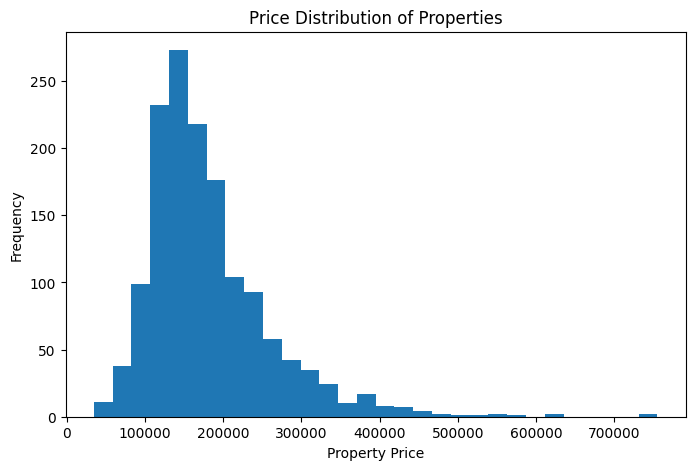

In [ ]:
# EDA Graph 1: Price Distribution (Histogram)


plt.figure(figsize=(8, 5))
plt.hist(df['SalePrice'], bins=30)
plt.xlabel('Property Price')
plt.ylabel('Frequency')
plt.title('Price Distribution of Properties')
plt.show()


Graph 2: House Size vs Price

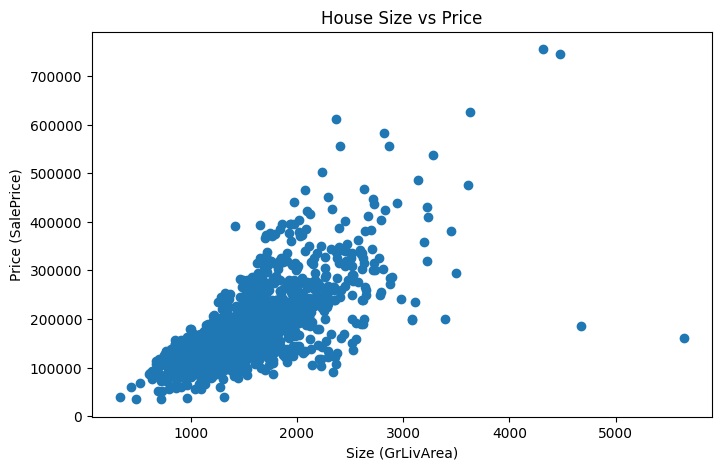

In [ ]:
# Scatter plot: House Size vs Price
plt.figure(figsize=(8, 5))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('Size (GrLivArea)')
plt.ylabel('Price (SalePrice)')
plt.title('House Size vs Price')
plt.show()


Graph 3: Price by Location

<Figure size 1500x600 with 0 Axes>

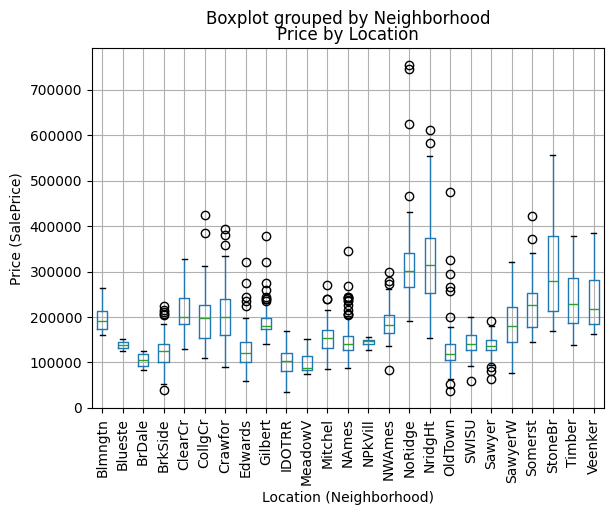

In [ ]:
# Box plot: Price by Location
plt.figure(figsize=(15, 6))
df.boxplot(column='SalePrice', by='Neighborhood', rot=90)
plt.xlabel('Location (Neighborhood)')
plt.ylabel('Price (SalePrice)')
plt.title('Price by Location')
plt.show()


Graph 4: Property Age vs Price

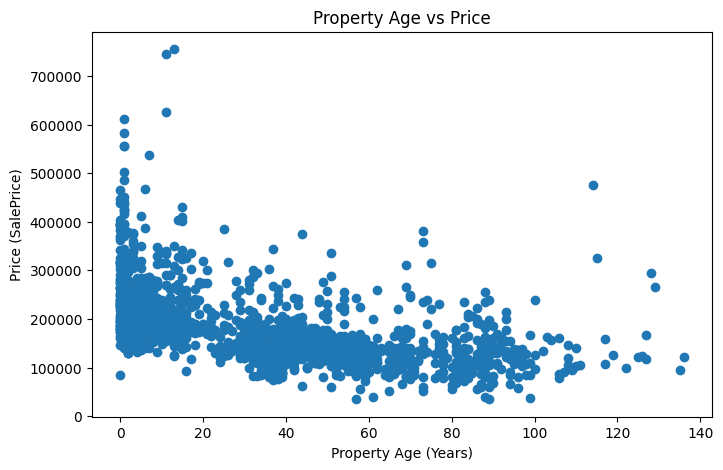

In [ ]:
# Create Property Age feature
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']
plt.figure(figsize=(8, 5))
plt.scatter(df['PropertyAge'], df['SalePrice'])
plt.xlabel('Property Age (Years)')
plt.ylabel('Price (SalePrice)')
plt.title('Property Age vs Price')
plt.show()


# 5. Machine Learning Workflow

Load the dataset

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

Handle missing values

Encode categorical variables

In [ ]:
le = LabelEncoder()

df['Neighborhood'] = le.fit_transform(df['Neighborhood'])
df['Condition1'] = le.fit_transform(df['Condition1'])
print(df)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

Scale numerical features (Size, Age, Price-related features)

In [ ]:
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_cols = ['GrLivArea', 'PropertyAge', 'TotalBsmtSF', 'GarageArea']
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [ ]:
X = df[['GrLivArea', 'PropertyAge', 'TotalBsmtSF', 'GarageArea',
        'Neighborhood', 'Condition1']]
y = df['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train regression models

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)


[136720.76761355 302187.40087978 106817.48247634 163168.93487233
 263749.50309739  73680.63758768 173296.17177394 171464.31949486
  74386.53309756 138575.89684861 128792.17331895 114031.13053531
 148967.31851284 224413.8577394  205794.10187551 116855.19870793
 206645.33229033 131574.09366305  95920.64244987 213786.93608155
 199726.06155741 219338.75242749 189237.19253367 113434.54444411
 211806.28973837 186627.2744318  195645.41785037 105157.08773463
 197380.94894905 209202.07251894 103143.95044551 264224.13493112
 258104.85591018 115024.40377443 261545.25841749 146293.03000324
 183043.95429605 218432.15631059 297984.37704523  83988.2016274
 120536.4682988  238070.59845175 125935.94531372 331304.79630606
 144777.45301022 151482.63882126 118253.63877519 133956.32556979
 306548.15501255 156103.89718629 111148.08152063 217233.65865923
 133323.64937673 316397.3798811  141453.95906639 249045.69662827
 205429.91293036 164285.20157798 161349.2866732   79510.01449395
  40584.84193337 147336.86

# 6. Models Used

Linear Regression -

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Decision Tree

In [ ]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

Random Forest Regressor-

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    bootstrap=True,
    random_state=42
)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

# 7. Model Evaluation

Graph 5: Actual vs Predicted Prices

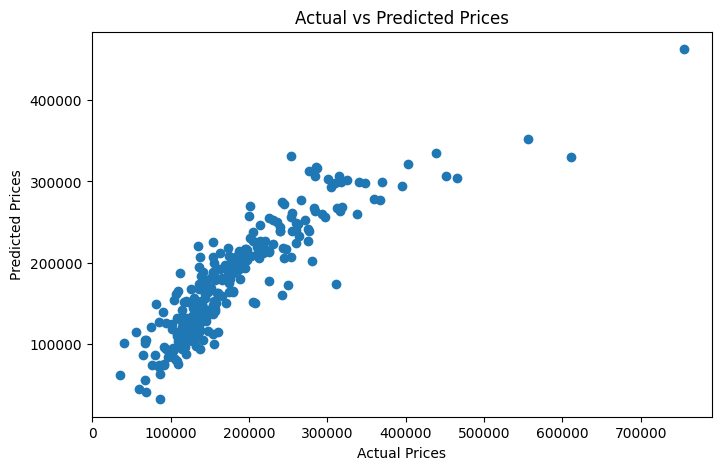

In [ ]:
# Scatter plot: Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


Metrics

In [ ]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 43372.87306819419
R2 Score: 0.75474235809854


# 8. Identifying Price-Influencing Factors

In [ ]:
feature_importance = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})


Graph 6: Feature Importance (Random Forest)

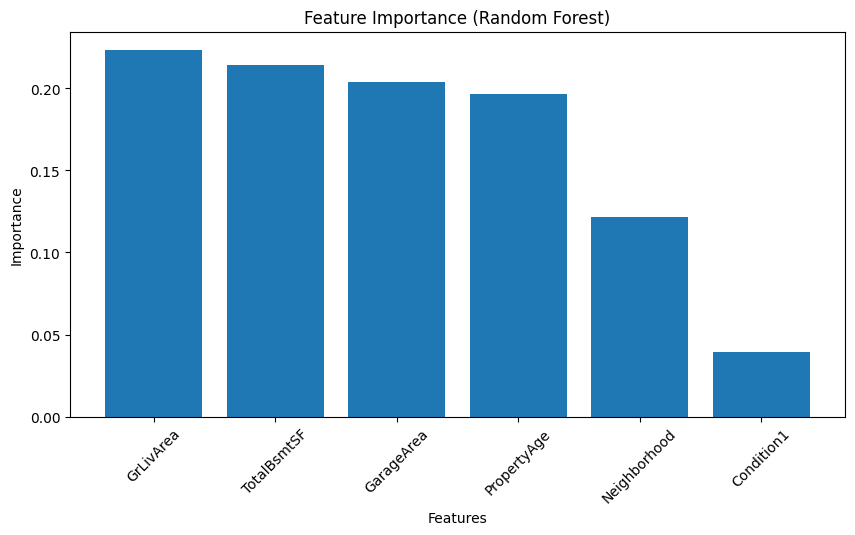

In [ ]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.xticks(rotation=45)
plt.show()

